# How to use Dukascopy Tick Data with mlfinlab
### Abstract
This notebook tries to explain the steps to use free Dukascopy tick data with mlfinlab. 
### Introduction
As mlfinlab authors already mentioned in their README file, finding good HFT data in tick level is hard and usually expensive. Luckily Dukascopy offers free tick data for forex, commodities and indices. 

mlfinlab library requires your input csv tick file specifically structured in 3 columns (Timestamp,Price,Vol). It is very hard to find this kind of tick data readily available for download. Generally this requires a conversion process.

Dukascopy's web interface doesn't allow you to determine a date range for tick data download, you have to download each day separately. So basically that is no use for us. Fortunately there are some other ways to reach it. They store their tick data in \*.bi5 binary format, each day in a separate file. For mass download you can use their Jforex platform or you can use a 3rd party tool(like Tickstory Lite) which automatically handles the batch download process.
### Tickstory Lite
First of all, I am not affiliated with either Dukascopy or Tickstory. I am just using them because they are free. I prefer to use Tickstory Lite for download because its export features satisfies our requirements.

After installing Tickstory Lite, you can just select a symbol, right click and start downloading binary tick data (bi5 format) from Dukascopy Tick Database. After the download has completed you can export it to csv file format. Actually you can use export directly without downloading first, because it will automatically download in the background for the missing days.

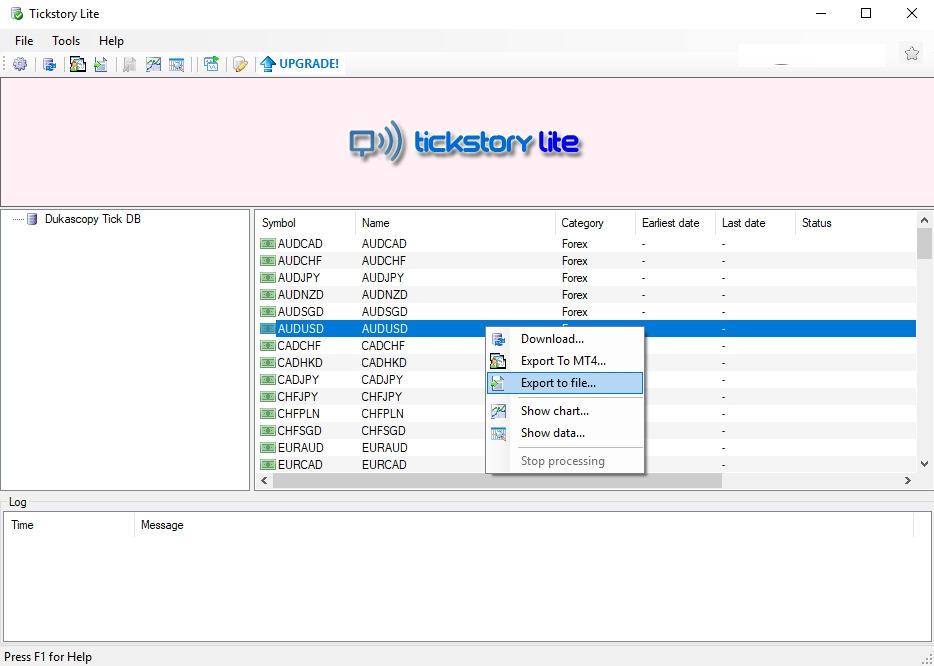

This is '**Export to file**' dialog. This is where we setup our csv data structure. At the top you can select the day range you want to export, down below you need to select the timeframe as '**Tick**' and in the Output Format section you need to select '**Custom**'. Select '**Include header**' checkbox, and you can type ```DateTime,Price,Volume``` as column header names. In Data Format section you can write ```{Timestamp:yyyy/MM/dd} {Timestamp:HH:mm:ss.fff},{BidPrice},{BidVolume:F0}``` as your data format. And as the last setting you just give a name for your tick data csv file. You can use ```{Symbol}_tick.csv``` to automatically capture selected symbol's name.

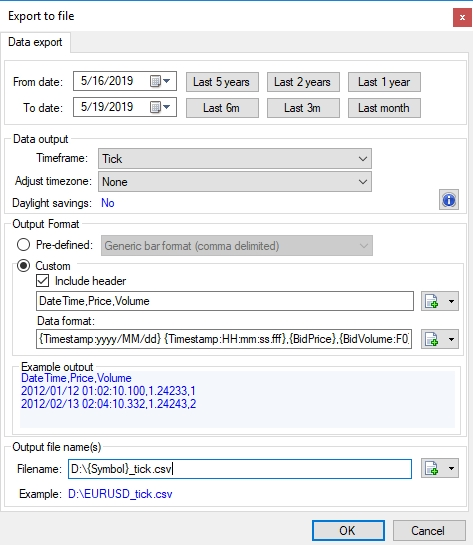

I am sure careful readers have noticed that there is a subtle trick in volume column data format. Dukascopy provides BidVolume in Millions so the values are in float type, that last ```:F0``` converts it into an integer. Maybe it is not much of a big problem for Forex, but for Commodities and Stocks you might want to preserve the float values and then use an extra intermediate process to multiply those float volume values with 1M and then store the integer value in csv file before using it with mlfinlab.